In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t_data = pd.read_csv("transcripts_dataset_final.csv.gz")
print(t_data.shape)

(105228, 16)


In [3]:
print(f"avg. confidence: {np.mean(t_data.avg_confidence):.1%}")
print(f"avg. words: {np.mean(t_data.word_count):.2f}")
print(f"Total hours of podcasts: {t_data.duration.sum()/60:.2f}")
print(f"Total number of words: {t_data.word_count.sum()}")

avg. confidence: 83.2%
avg. words: 5731.78
Total hours of podcasts: 59378.80
Total number of words: 603143757


In [4]:
t_data.language.value_counts()

['en']       79452
['en-US']    20264
['en-GB']     2335
['en-AU']     1377
['en-CA']      962
['en-PH']      368
['en-IE']      243
['en-NZ']      141
['en-ZA']       86
Name: language, dtype: int64

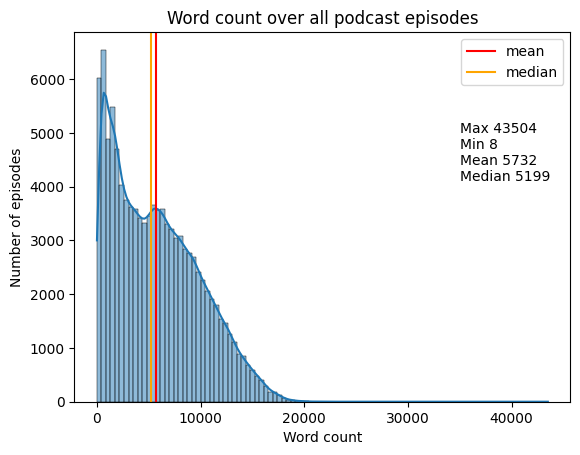

In [5]:
sns.histplot(t_data.word_count, bins = 100, kde = True)
plt.axvline(np.mean(t_data.word_count), color = "r", label = "mean")
plt.axvline(np.median(t_data.word_count), color ="orange", label = "median")
plt.text(35000, 5000, f"Max {max(t_data.word_count)}")
plt.text(35000, 4700, f"Min {min(t_data.word_count)}")
plt.text(35000, 4400, f"Mean {np.mean(t_data.word_count):.0f}")
plt.text(35000, 4100, f"Median {np.median(t_data.word_count):.0f}")
plt.title("Word count over all podcast episodes")
plt.xlabel("Word count")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()

In [6]:
print(f"There are {len(t_data[t_data.word_count < 50])} podcasts with less than 50 words")
print(f"There are {len(t_data[t_data.word_count < 100])} podcasts with less than 100 words")
print(f"There are {len(t_data[t_data.word_count < 250])} podcasts with less than 250 words")
print(f"There are {len(t_data[t_data.word_count < 1000])} podcasts with less than 1000 words")
print(f"There are {len(t_data[t_data.word_count > 20000])} podcasts with more than 20 000 words")

There are 236 podcasts with less than 50 words
There are 609 podcasts with less than 100 words
There are 2461 podcasts with less than 250 words
There are 14075 podcasts with less than 1000 words
There are 33 podcasts with more than 20 000 words


In [7]:
print(f"On average, {sum(t_data.word_count) / sum(t_data.duration):.2f} words are spoken per minute")

On average, 169.29 words are spoken per minute


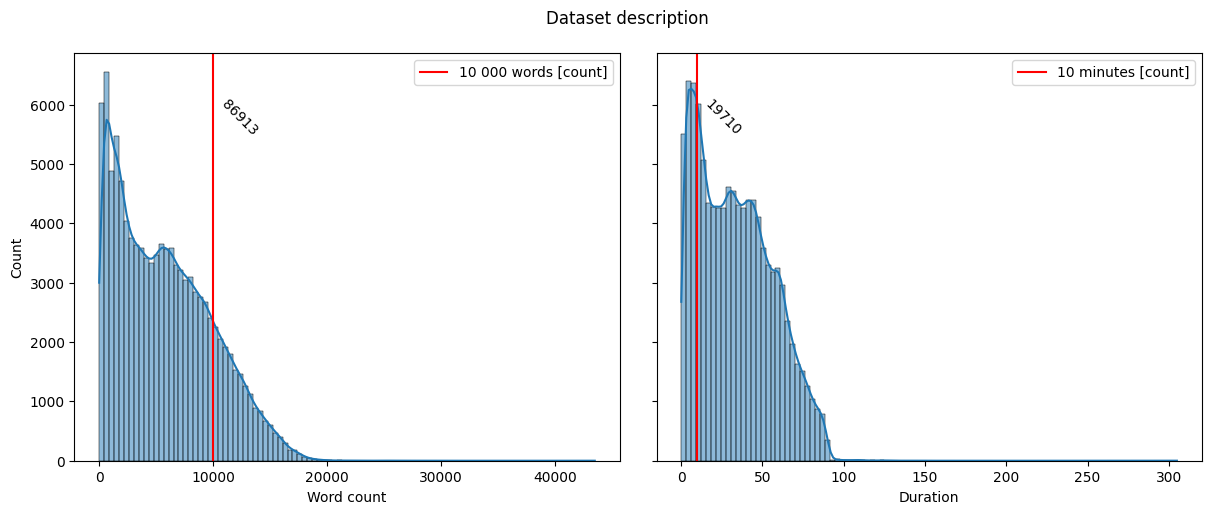

In [41]:
# Calculate label stats for below charts
duration_10 = t_data.groupby(t_data.duration <=10)["duration"].count().values[1]
word_count_10 = t_data.groupby(t_data.word_count <=10000)["word_count"].count().values[1]

# plot
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
fig.suptitle("Dataset description")
fig.tight_layout()

sns.histplot(t_data.word_count, bins = 100, kde = True, ax= axs[0])
sns.histplot(t_data.duration, bins = 100, kde = True, ax= axs[1])
axs[0].axvline(10000, color= "r", label = "10 000 words [count]")
axs[0].text(10500, 5500, word_count_10, rotation=-45)
axs[0].set_xlabel("Word count")
axs[1].axvline(10, color= "r", label ="10 minutes [count]")
axs[1].text(13, 5500, duration_10, rotation=-45)
axs[1].set_xlabel("Duration")
axs[0].legend()
axs[1].legend()
plt.show()

In [9]:
# Duration stats
print(f"Max duration {max(t_data.duration):.2f}")
print(f"Min duration {min(t_data.duration):.2f}")
print(f"Mean duration {np.mean(t_data.duration):.2f}")
print(f"Median duration {np.median(t_data.duration):.2f}")
print(f"There are {len(t_data[t_data.duration < 1])} podcasts shorter than 1 min")
print(f"There are {len(t_data[t_data.duration < 5])} podcasts shorter than 5 min")
print(f"There are {len(t_data[t_data.duration > 100])} podcasts longer than 100 min")

Max duration 304.95
Min duration 0.18
Mean duration 33.86
Median duration 31.66
There are 741 podcasts shorter than 1 min
There are 9583 podcasts shorter than 5 min
There are 83 podcasts longer than 100 min


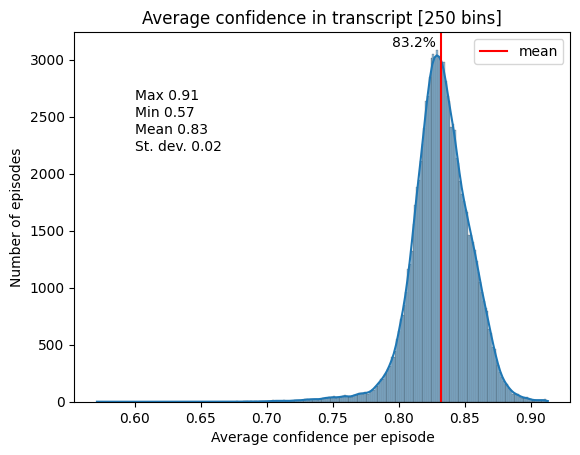

In [10]:
sns.histplot(t_data.avg_confidence, kde=True, bins = 250)
plt.axvline(np.mean(t_data.avg_confidence), color = "r", label = "mean")
plt.text(0.795, 3110, f"{np.mean(t_data.avg_confidence):.1%}")
plt.text(0.6, 2650, f"Max {max(t_data.avg_confidence):.2f}")
plt.text(0.6, 2500, f"Min {min(t_data.avg_confidence):.2f}")
plt.text(0.6, 2350, f"Mean {np.mean(t_data.avg_confidence):.2f}")
plt.text(0.6, 2200, f"St. dev. {np.std(t_data.avg_confidence):.2f}")
plt.title("Average confidence in transcript [250 bins]")
plt.xlabel("Average confidence per episode")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()

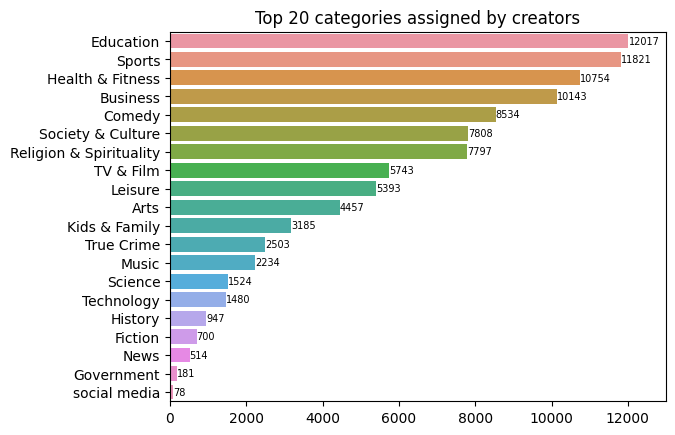

Total number of categories: 129

Top Categories


Education                    12017
Sports                       11821
Health & Fitness             10754
Business                     10143
Comedy                        8534
Society & Culture             7808
Religion & Spirituality       7797
TV & Film                     5743
Leisure                       5393
Arts                          4457
Kids & Family                 3185
True Crime                    2503
Music                         2234
Science                       1524
Technology                    1480
History                        947
Fiction                        700
News                           514
Government                     181
social media                    78
startups                        75
Football                        73
Business:Entrepreneurship       72
Fitness                         58
Drama                           58
Name: category, dtype: int64

In [38]:
# Visualise creator categories
plt.rcParams.update({'font.size': 10})
top_categories = t_data.category.value_counts().head(20)
ax = sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlim(0,13000)
plt.title("Top 20 categories assigned by creators")
plt.rcParams.update({'font.size': 7})  # decrease font size
ax.bar_label(ax.containers[0])
plt.rcParams.update({'font.size': 10})  # return to normal font size
plt.show()

print(f"Total number of categories: {len(t_data.category.value_counts())}")
print()
print("Top Categories")
t_data.category.value_counts().head(25)

In [42]:
print("Bottom Categories")
t_data.category.value_counts().tail(25)

Bottom Categories


reviews                       1
Authenticity                  1
Retro                         1
Government & Organizations    1
Lakers                        1
Finance                       1
narcissism                    1
twenties                      1
gaming                        1
rural                         1
Gambling                      1
blue-collar                   1
a quick timeout               1
band room                     1
Coaching                      1
Animation & Manga             1
fishing                       1
witchcraft                    1
finances                      1
crowdedmind                   1
Entrepreneur                  1
cashflow                      1
844629                        1
Perspective                   1
Roleplaying                   1
Name: category, dtype: int64